## Reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re

In [2]:
def clean(df, topk=False):
    df = df[df['State'] == 'finished']

    if topk:
        patterns = ['effective_l0$', 'frac_recovered$', 'mse_loss$', 'loss_original$', 'loss_reconstructed$']
    else:
        patterns = ['l0$', 'frac_recovered$', 'mse_loss$', 'loss_original$', 'loss_reconstructed$']
    filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]
    df = df[filtered_columns]
    df.columns = [col.split('/')[-1] for col in df.columns]
    
    if topk:
        l0 = df["effective_l0"].to_numpy().flatten()
    else:
        l0 = df["l0"].to_numpy().flatten()
    mse_loss = df["mse_loss"].to_numpy().flatten()
    frac_recovered = df["frac_recovered"].to_numpy().flatten()
    loss_original = df["loss_original"].to_numpy().flatten()
    loss_reconstructed = df["loss_reconstructed"].to_numpy().flatten()
    delta_ce = loss_reconstructed - loss_original

    data = np.array([l0, mse_loss, frac_recovered, delta_ce]).T
    df = pd.DataFrame(data, columns=['l0', 'mse_loss', 'frac_recovered', 'delta_ce'])
    df = df.sort_values(by='l0')
    return df

In [3]:
def clean_switch(df):
    df = df[df['State'] == 'finished']

    patterns = ['experts$', 'effective_l0$', 'mse_loss$', 'frac_recovered$', 'loss_original$', 'loss_reconstructed$', 'frac_recovered$']
    filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]
    df = df[filtered_columns]
    df.columns = [re.split(r'[./]', col)[-1] for col in df.columns]
    
    l0 = df["effective_l0"].to_numpy().flatten()
    mse_loss = df["mse_loss"].to_numpy().flatten()
    experts = df["experts"].to_numpy().flatten()
    loss_original = df["loss_original"].to_numpy().flatten()
    loss_reconstructed = df["loss_reconstructed"].to_numpy().flatten()
    frac_recovered = df["frac_recovered"].to_numpy().flatten()
    delta_ce = loss_reconstructed - loss_original

    data = np.array([experts, l0, mse_loss, frac_recovered, delta_ce]).T
    df = pd.DataFrame(data, columns=['experts', 'l0', 'mse_loss', 'frac_recovered', 'delta_ce'])
    df = df.sort_values(by='l0')
    return df

In [4]:
df_switch = pd.read_csv("primary-switch-fast.csv")
df_switch = clean_switch(df_switch)

In [5]:
df_1on = pd.read_csv("1on.csv")
df_1on = clean_switch(df_1on)

In [6]:
df_1on

,experts,l0,mse_loss,frac_recovered,delta_ce
6,32.0,8.0,2590.572754,0.951566,0.679734
7,32.0,16.0,1851.957520,0.976876,0.331371
4,32.0,32.0,1360.903320,0.987024,0.182102
5,32.0,48.0,1186.752441,0.990559,0.135286
2,32.0,64.0,1069.776123,0.992008,0.112160
3,32.0,96.0,914.497864,0.994332,0.081226
0,32.0,128.0,793.985596,0.995732,0.059904
1,32.0,192.0,644.254333,0.996818,0.045596


In [7]:
df_switch16 = df_switch[df_switch['experts'] == 16]

In [8]:
df_switch16

,experts,l0,mse_loss,frac_recovered,delta_ce
52,16.0,8.0,2254.317139,0.962151,0.531175
53,16.0,16.0,1674.737305,0.980826,0.274767
48,16.0,32.0,1296.666138,0.988825,0.156826
49,16.0,48.0,1147.791748,0.991167,0.126576
44,16.0,64.0,1027.224487,0.993132,0.096382
45,16.0,96.0,885.730469,0.994665,0.076447
40,16.0,128.0,760.248779,0.996071,0.055145
41,16.0,192.0,589.277832,0.997625,0.034039


## Plotting

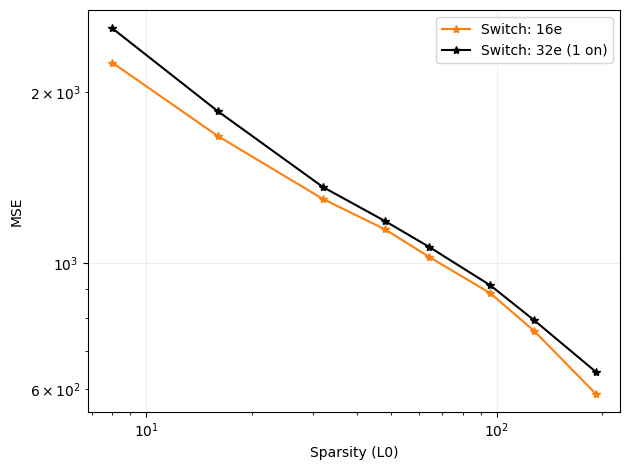

In [9]:
plt.plot(df_switch16['l0'], df_switch16['mse_loss'], label='Switch: 16e', marker='*', color='#ff7f0e')
plt.plot(df_1on['l0'], df_1on['mse_loss'], label='Switch: 32e (1 on)', marker='*', color='#000000')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("MSE")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("l0_mse.png")
plt.show()

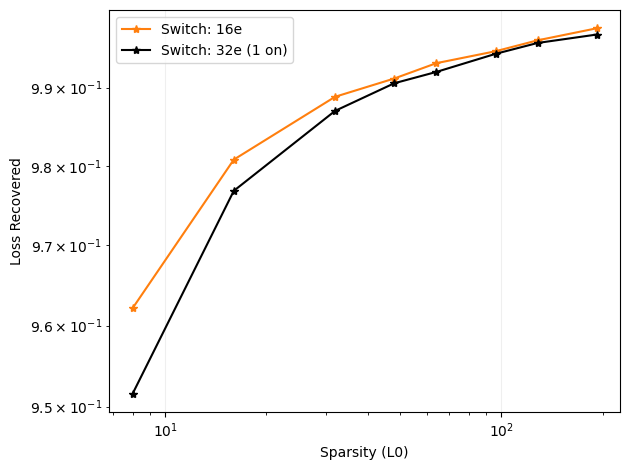

In [13]:
plt.plot(df_switch16['l0'], df_switch16['frac_recovered'], label='Switch: 16e', marker='*', color='#ff7f0e')
plt.plot(df_1on['l0'], df_1on['frac_recovered'], label='Switch: 32e (1 on)', marker='*', color='#000000')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("Loss Recovered")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("l0_mse.png")
plt.show()

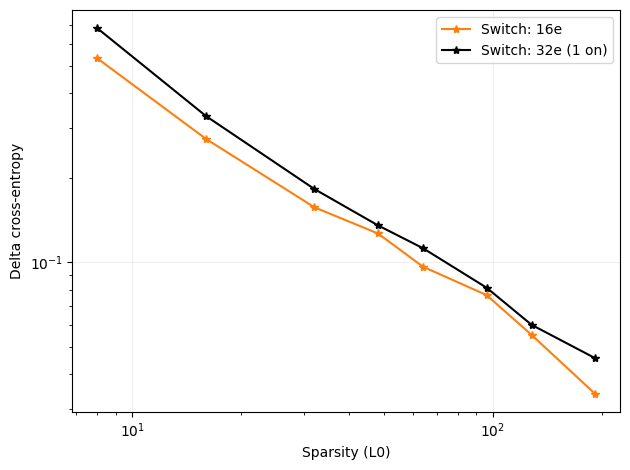

In [14]:
plt.plot(df_switch16['l0'], df_switch16['delta_ce'], label='Switch: 16e', marker='*', color='#ff7f0e')
plt.plot(df_1on['l0'], df_1on['delta_ce'], label='Switch: 32e (1 on)', marker='*', color='#000000')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("Delta cross-entropy")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("l0_mse.png")
plt.show()